## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random
import time

def arr_python():
    normal_arr = [random.random() for _ in range(10000)]
    return [x + 1 for x in normal_arr]

def arr_numpy():
    numpy_arr = np.random.rand(10000)
    return np.add(numpy_arr, 1)

start_time_python = time.time()
result_python = arr_python()
end_time_python = time.time()
time_python = end_time_python - start_time_python


start_time_python = time.time()
result_python = arr_numpy()
end_time_python = time.time()
time_numpy = end_time_python - start_time_python

if time_python > time_numpy:
    print("Python jest wolniejszy!")
else:
    print("Numpy jest wolniejsze!")

Python jest wolniejszy!


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [3]:
from math import sin, cos


def calc_loop(array):
    result = []
    for x in array:
        result.append(sin(x) + cos(x))
    return result

def calc_numpy(array):
    return np.sin(array) + np.cos(array)

random_array = np.random.rand(10000)

start_time = time.time()
result_with_loop = calc_loop(random_array)
end_time = time.time()
loop_time = end_time - start_time


start_time = time.time()
result_with_numpy = calc_numpy(random_array)
end_time = time.time()
numpy_time = end_time - start_time

if loop_time > numpy_time:
    print("Python jest wolniejszy!")
else:
    print("Numpy jest wolniejsze!")


Python jest wolniejszy!


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [4]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def numpy_cube_sum(x):
    """Zwraca sume szescianow elementow"""
    return np.sum(x ** 3)


def numpy_almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    n = x.mean()
    return np.mean((x - n) ** 4)

array = np.random.randint(250, size=250)

start = time.time()
cube_sum(array)
period = time.time() - start
print("1, python: ", period)

start = time.time()
numpy_cube_sum(array)
period = time.time() - start
print("1, numpy: ", period)

start = time.time()
almost_variance(array)
period = time.time() - start
print("2, python: ", period)

start = time.time()
numpy_almost_variance(array)
period = time.time() - start
print("2, numpy: ", period)

1, python:  9.799003601074219e-05
1, numpy:  9.608268737792969e-05
2, python:  0.00017404556274414062
2, numpy:  0.00012803077697753906


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [5]:
A = np.arange(1, 11).reshape((10, 1)) * np.arange(1,11)
print(A)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [6]:
def calc_euclidean_distance(arr):
    n = arr.shape[0]
    res = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            res[i, j] = np.linalg.norm(arr[i, :] - arr[j, :])**2
            res[j, i] = res[i, j]
    return res

tab = np.random.randn(10,5)
print (tab)

print(np.round(calc_euclidean_distance(tab), decimals=3))

[[ 2.37808661  0.89025219 -0.28633856 -0.57562716  1.3539279 ]
 [-1.01744524  0.35707919 -0.1581419  -0.1428223  -2.41780747]
 [-1.07324135  1.31738799 -1.06118109 -0.07686858  1.35468123]
 [-0.62579372  2.08336099  0.50058611  0.06556492 -1.68163787]
 [-1.05106899 -0.44578857  2.13933227 -1.36310459 -1.70172797]
 [ 0.74874147 -0.78319448 -0.72989974 -1.37127429 -0.47702306]
 [-0.28822543 -0.72263845 -0.49945967  0.65686704  1.00479503]
 [ 1.29654394  0.50744825  0.83235815  0.45440604  0.4941801 ]
 [ 0.40546116 -0.42801846 -0.03379744 -0.27730883 -0.78603199]
 [ 0.26380003 -1.90721261 -0.54437636  0.14024482  0.74006054]]
[[ 0.    26.244 12.943 20.692 29.385  9.637 11.397  4.368 10.361 13.252]
 [26.244  0.    15.977  4.153  7.926 10.022 14.168 15.195  5.337 16.97 ]
 [12.943 15.977  0.    12.466 24.349 12.872  5.754 10.88  10.911 12.878]
 [20.692  4.153 12.466  0.    11.304 15.136 16.554 11.174  8.576 23.678]
 [29.385  7.926 24.349 11.304  0.    13.086 19.027 16.253  8.862 19.289]
 [ 9

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [7]:
def white(A):
    return (A - np.mean(A, axis=0))/ np.std(A, axis=0)


print(white(np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]])))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [8]:
def closest(x, A):
    idx = (np.abs(A - x)).argmin()
    return A[idx]

A = np.array([2,3,4,7,10,1,0])

print(closest(7.1, A))

7


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [9]:
def poly(x, a):
    poly = np.ones(len(a)) + x - 1
    poly = np.cumprod(poly)
    poly = [el*poly_el for el, poly_el in zip(a[1::], poly)]
    return sum(poly) + a[0]

print(poly(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])) #55
print(poly(2, [4, -2, 1, 0, -3])) #-44
print(poly(3, [7, 0, -2])) #-11
print(poly(4, [5, 0, 0, 0, 0])) #5
print(poly(5, [3, 3, 3])) #93

55.0
-44.0
-11.0
5.0
93.0


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

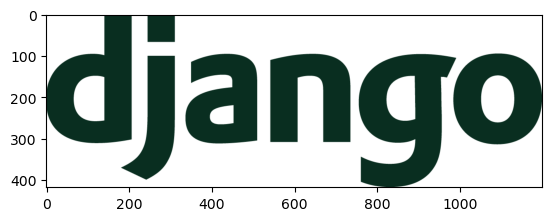

In [11]:
img = mpimg.imread('images/django.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

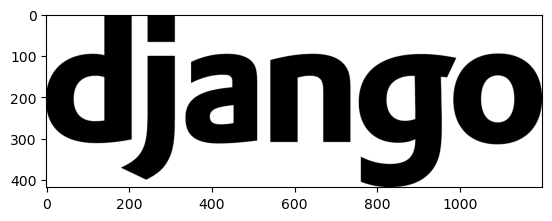

In [12]:
def to_gray(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    return 0.2126 * R + 0.7152 * G + 0.0722 * B

img = to_gray(img)
plt.imshow(img, cmap=('gray'))

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [13]:
def interpolate(x1, x2):
    lambd = np.linspace(0, 1, 10).reshape(10, 1)
    return (lambd * x1 + (1 - lambd) * x2)


print(interpolate(2, 6))

[[6.        ]
 [5.55555556]
 [5.11111111]
 [4.66666667]
 [4.22222222]
 [3.77777778]
 [3.33333333]
 [2.88888889]
 [2.44444444]
 [2.        ]]
